# Let's make matplotlib do math...maybe

First let's import the data and remake one of the figures from the [overview](01_overview.ipynb) notebook. 

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("http://bit.ly/tcsv19").dropna()

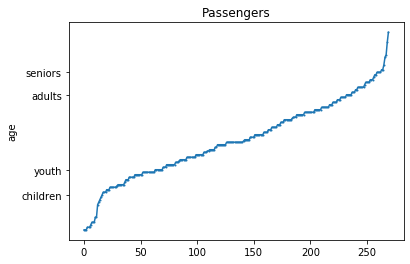

In [6]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set(title='Passengers', ylabel='age')
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

The above figure is a expected cumulative distribution graph. It shows that most passengers are adults, but it is a bit hard to do comparisons, especially at the tales. Instead, we compute the histogram of passenger ages. 

# Let's make Histograms

Here we call the histogram function, which by default creates 10 equally spaced bins. 

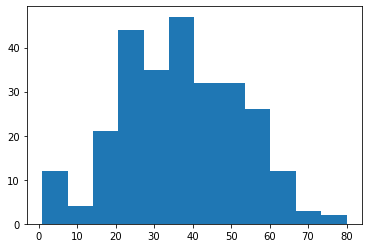

In [11]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins='auto', data=df)

## Custom Bins to match our CDF

In our line plot, we use bins based on the census-a commonly accepted binning for ages. We can pass those bins into our histogram function via the `bins` parameter. 

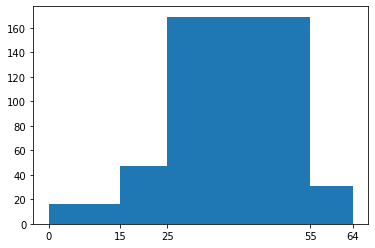

In [28]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins=[0, 15,25, 55, 64], data=df)
_ = ax.set_xticks([0, 15,25, 55, 64])

### Probability density

By default `ax.hist` returns the number in each bin and the bin edges used.  The bin edges array is 1 longer than the counts because it is all of the left bin edges and then right edge of the last bin.  This is useful when we need to compare absolute values between data sets, but sometime we need to be able to compare the probability density instead.  In the continuous limit, probability density has the condition:

$$1 = \int_{-\infty}^{\infty} P(x)dx$$

and in the discrete case:
$$1 = \sum_{n=0}^N w_n p_n$$

where $w_n$ is the width of the nth bin. We set the `density` parameter to true to plot the density of the data. 

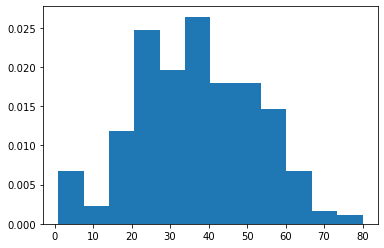

In [14]:
fig, ax = plt.subplots()
# only consider rows where we know the age
(density, edges, _) = ax.hist('age', bins='auto', data=df, density=True)

assert np.sum(np.diff(edges) * density) == 1

# Practice:
1. Make histogram of fares
2. Use the bins defined in the [overview](01_overview.ipynb)

# Use groupby to simplify code

![](../images/groupby.png?)
source: [pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)


Groupby is used to gather all rows that have one observation of one variable in common. For example, a '.groupby('sex')' gathers all the rows where the sex is male and puts them in one dataframe, and puts all the rows where the sex is female into a second dataframe. 

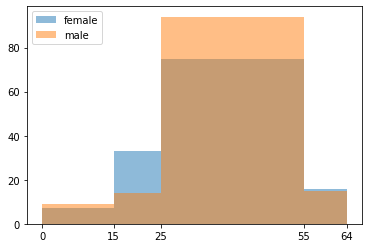

In [31]:
fig, ax = plt.subplots()
# only consider rows where we know the age
for label, gdf in df.groupby('sex'):
    ax.hist('age', bins=[0, 15,25, 55, 64], data=gdf, label=label, alpha=.5)
_ = ax.set_xticks([0, 15,25, 55, 64])
_ = ax.legend()

# Lets make things interactive

Just as in the [previous notebook](02_visual_variables.ipynb), we can link multiple graphs together via the sharex parameter.

FigureCanvasNbAgg()

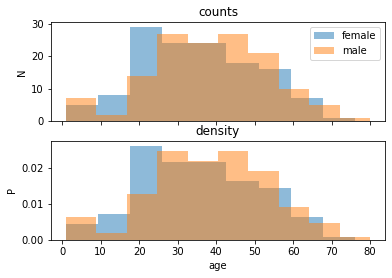

In [35]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# only consider rows where we know the age
for label, gdf in df.groupby('sex'):
    ax1.hist('age', bins='auto', data=gdf, label=label, alpha=.5)
    ax2.hist('age', bins='auto', data=gdf, label=label, alpha=.5, density=True)

_ = ax1.legend()
_ = ax1.set(title='counts', ylabel='N')
_ = ax2.set(title='density', ylabel='P', xlabel='age')

# What about bars and pies?